# IMPORTS

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings

# DATA LOADING 

In [2]:
df = pd.read_csv('/kaggle/input/pfeature/EEW_features_2024-10-21.csv')

df.columns

Index([' filename ', ' date ', ' time ', ' Rmag ', ' Rdpth ', ' Rlat ',
       ' Rlon ', ' Station ', ' Sheight ', ' Slat ', ' Slon ', ' RSdistance ',
       ' azimuth ', ' pkev12 ', ' pkev23 ', ' durP ', ' tauPd ', ' tauPt ',
       ' PDd ', ' PVd ', ' PAd ', ' PDt ', ' PVt ', 'PAt ', ' ddt_PDd ',
       ' ddt_PVd ', ' ddt_PAd ', ' ddt_PDt ', ' ddt_PVt ', 'ddt_PAt ', ' PGA ',
       ' PGV ', ' tPGA ', ' tPGV '],
      dtype='object')

In [13]:
df.head()

,filename,date,time,Rmag,Rdpth,Rlat,Rlon,Station,Sheight,Slat,...,ddt_PDd,ddt_PVd,ddt_PAd,ddt_PDt,ddt_PVt,ddt_PAt,PGA,PGV,tPGA,tPGV
0,1,2,3,4.0,5,6.000,7.000,8,9.0,10.0000,...,25.00000,26.00000,27.00000,28,29,30,31.000,32.000,33.00,34.00
1,'HKD0540001282321.EW',2000/01/28,23:21:00,6.8,56,42.983,146.711,HKD054,63.0,43.7996,...,0.00637,0.08890,0.69803,0.04389,0.21261,1.91145,26.949,7.176,32.19,31.36
2,'HKD0550001282321.EW',2000/01/28,23:21:00,6.8,56,42.983,146.711,HKD055,23.0,43.8244,...,0.00554,0.05553,1.18973,0.05951,0.39105,6.53578,60.838,8.211,30.04,30.43
3,'HKD0590001282321.EW',2000/01/28,23:21:00,6.8,56,42.983,146.711,HKD059,30.0,43.8569,...,0.02187,0.09294,1.50502,0.07332,0.26394,7.50573,108.173,17.529,28.40,31.00
4,'HKD0600001282321.EW',2000/01/28,23:21:00,6.8,56,42.983,146.711,HKD060,6.0,43.9136,...,0.00051,0.09748,3.17435,0.07002,0.44141,15.92743,155.062,14.556,27.09,30.06


In [22]:
data = df[[' pkev12 ', ' pkev23 ', ' durP ', ' tauPd ', ' tauPt ',
       ' PDd ', ' PVd ', ' PAd ', ' PDt ', ' PVt ', 'PAt ', ' ddt_PDd ',
       ' ddt_PVd ', ' ddt_PAd ', ' PGA ']]

data = data.replace([np.inf, -np.inf], np.nan)
data.columns = data.columns.str.strip()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25437 entries, 0 to 25436
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pkev12   25437 non-null  float64
 1   pkev23   25437 non-null  float64
 2   durP     25437 non-null  float64
 3   tauPd    25437 non-null  float64
 4   tauPt    25437 non-null  float64
 5   PDd      25437 non-null  float64
 6   PVd      25437 non-null  float64
 7   PAd      25437 non-null  float64
 8   PDt      25437 non-null  float64
 9   PVt      25437 non-null  float64
 10  PAt      25437 non-null  float64
 11  ddt_PDd  25437 non-null  float64
 12  ddt_PVd  25437 non-null  float64
 13  ddt_PAd  25437 non-null  float64
 14  PGA      25437 non-null  float64
dtypes: float64(15)
memory usage: 2.9 MB


In [15]:
data[' PGA '].describe()

count    25437.000000
mean       118.728420
std        264.499408
min          0.477000
25%          9.655000
50%         32.791000
75%        107.627000
max       6253.012000
Name:  PGA , dtype: float64

# SCALING PGA 

In [4]:
data.loc[:, 'PGA'] = data['PGA'] / 980.665

data['PGA'].describe()

count    25437.000000
mean         0.121069
std          0.269714
min          0.000486
25%          0.009845
50%          0.033438
75%          0.109749
max          6.376298
Name: PGA, dtype: float64

# LINEAR CORRELATION 

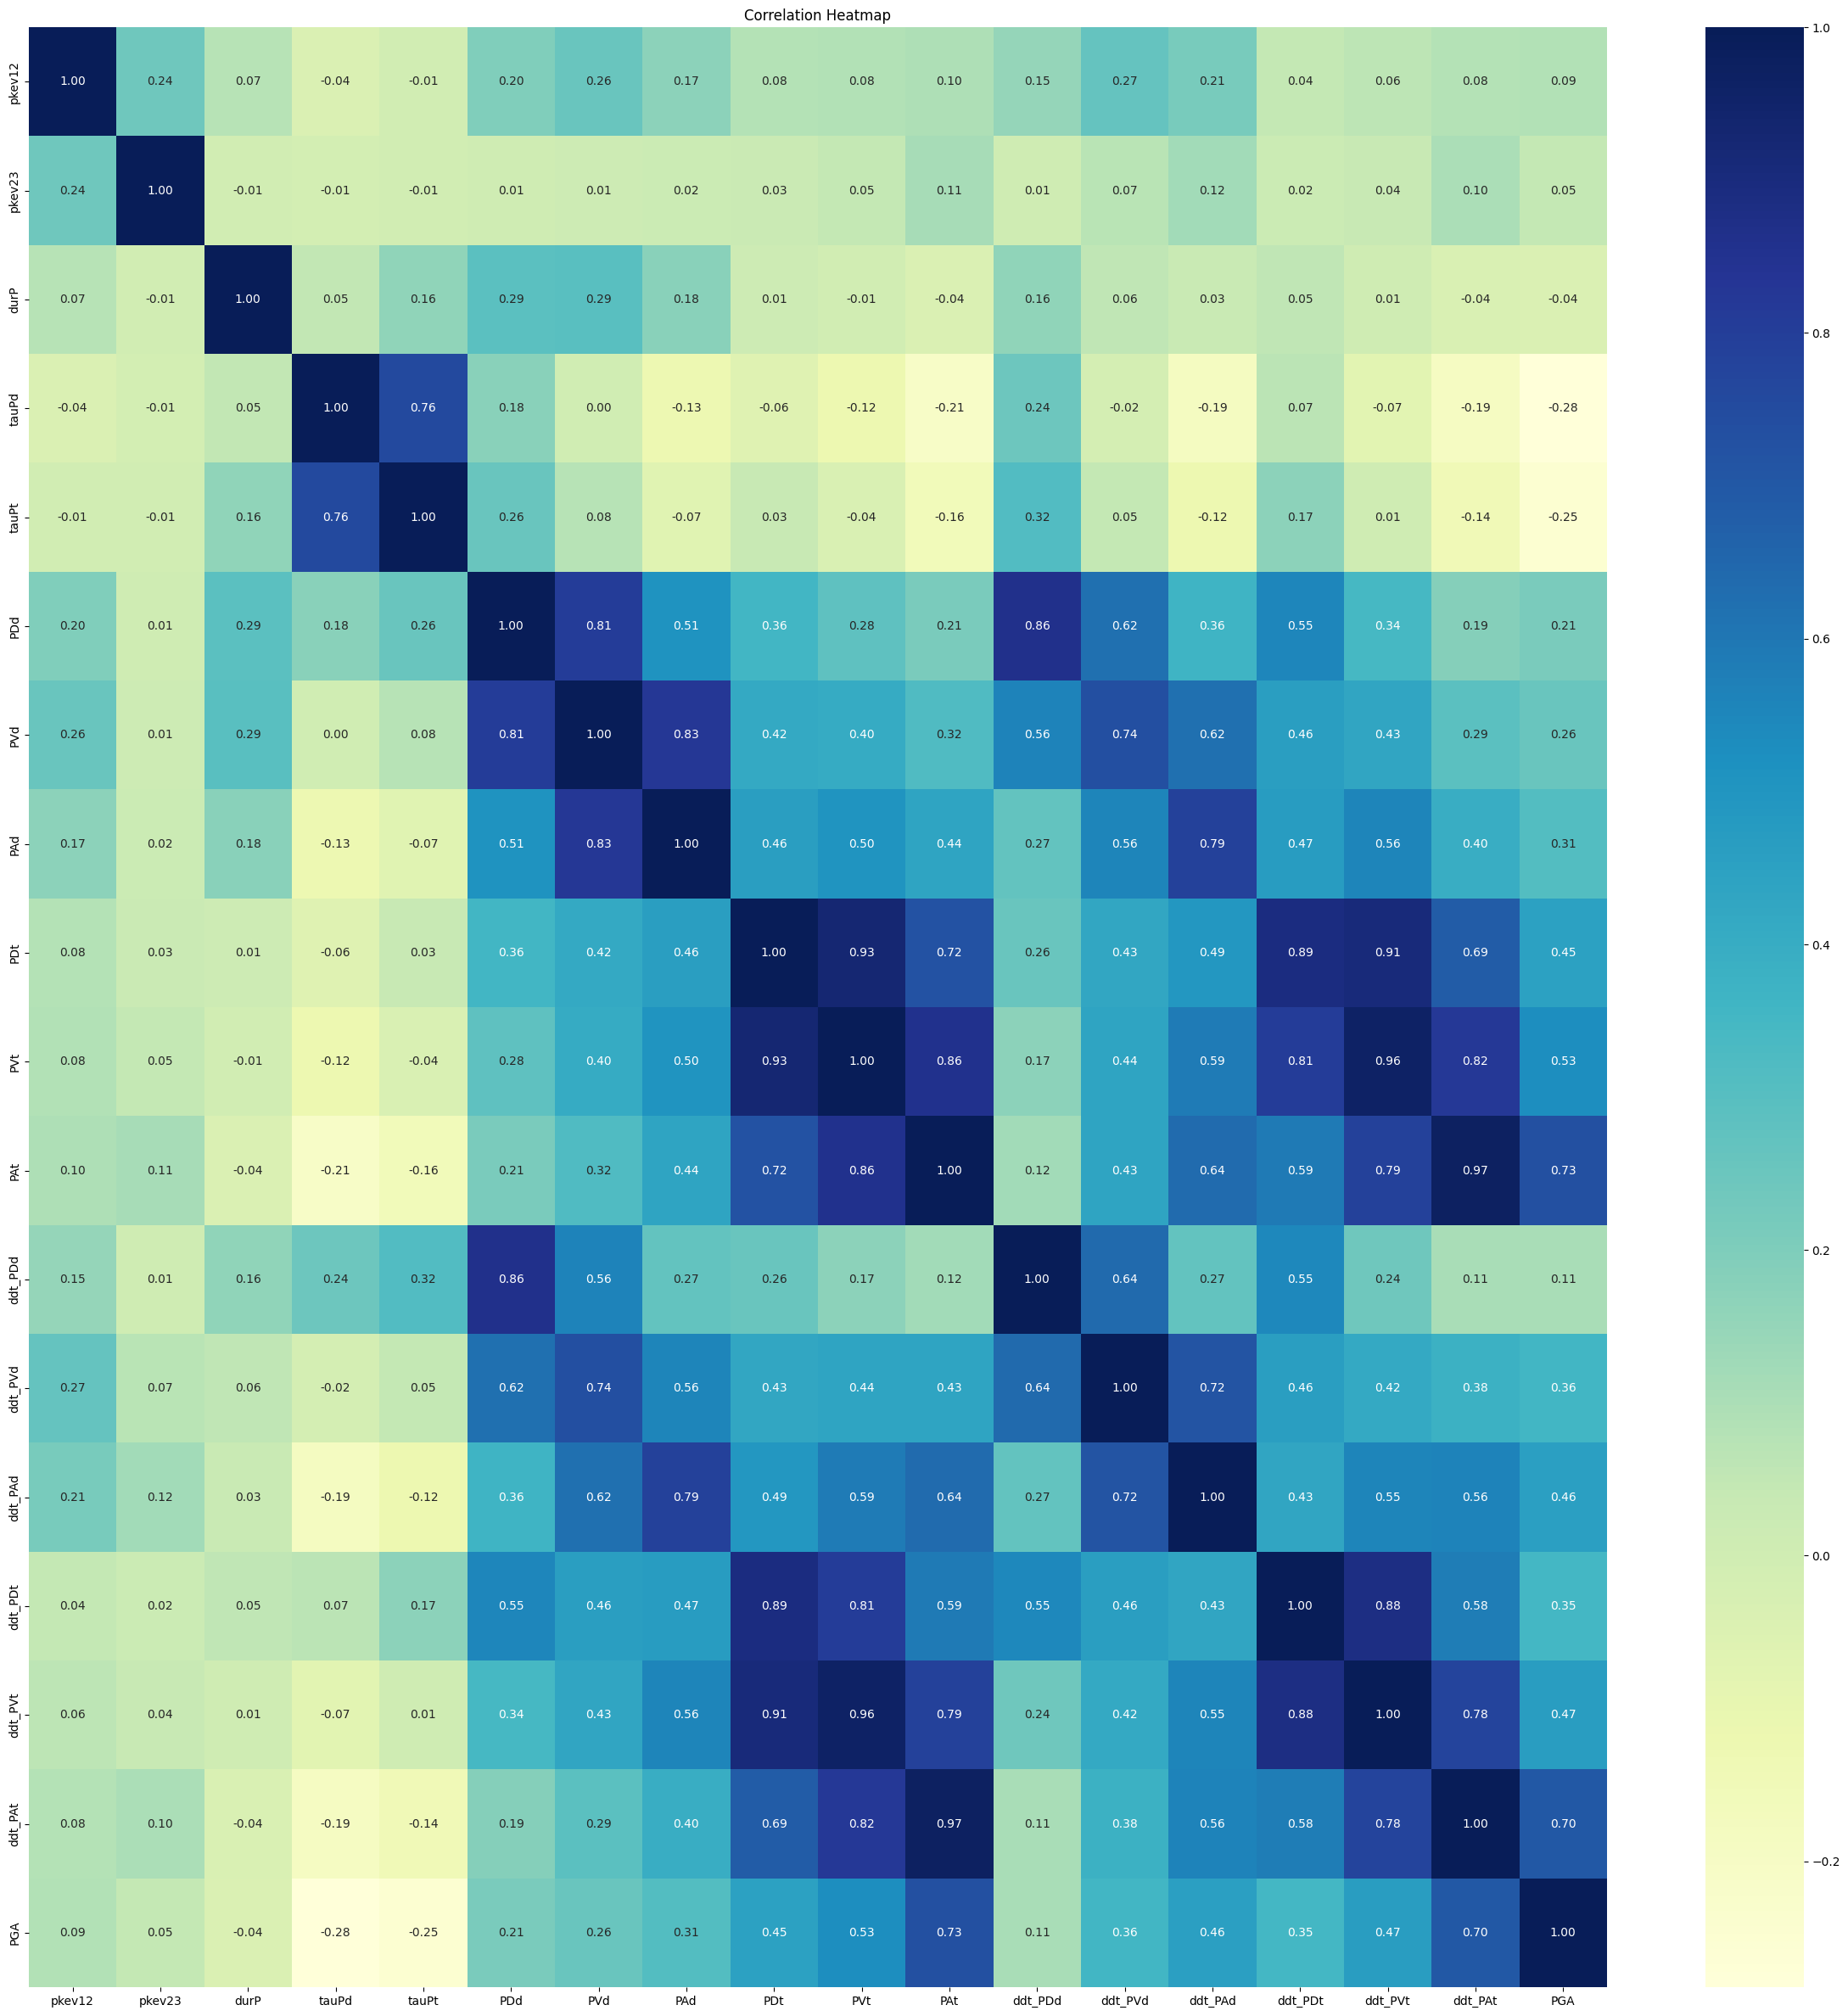

In [17]:
plt.figure(figsize=(30,30))

sns.heatmap(data.corr(), fmt=".2f", cmap='YlGnBu', annot=True)

plt.title("Correlation Heatmap")

plt.show()

In [18]:
data.corr()['PGA'].sort_values(ascending=False)

PGA        1.000000
PAt        0.729996
ddt_PAt    0.699489
PVt        0.527991
ddt_PVt    0.468002
ddt_PAd    0.456526
PDt        0.449657
ddt_PVd    0.358191
ddt_PDt    0.349419
PAd        0.311182
PVd        0.258245
PDd        0.210669
ddt_PDd    0.106611
pkev12     0.087867
pkev23     0.045825
durP      -0.040638
tauPt     -0.248332
tauPd     -0.282417
Name: PGA, dtype: float64

# SAMPLED SCATTER PLOT AND FEATURE HISTOGRAM

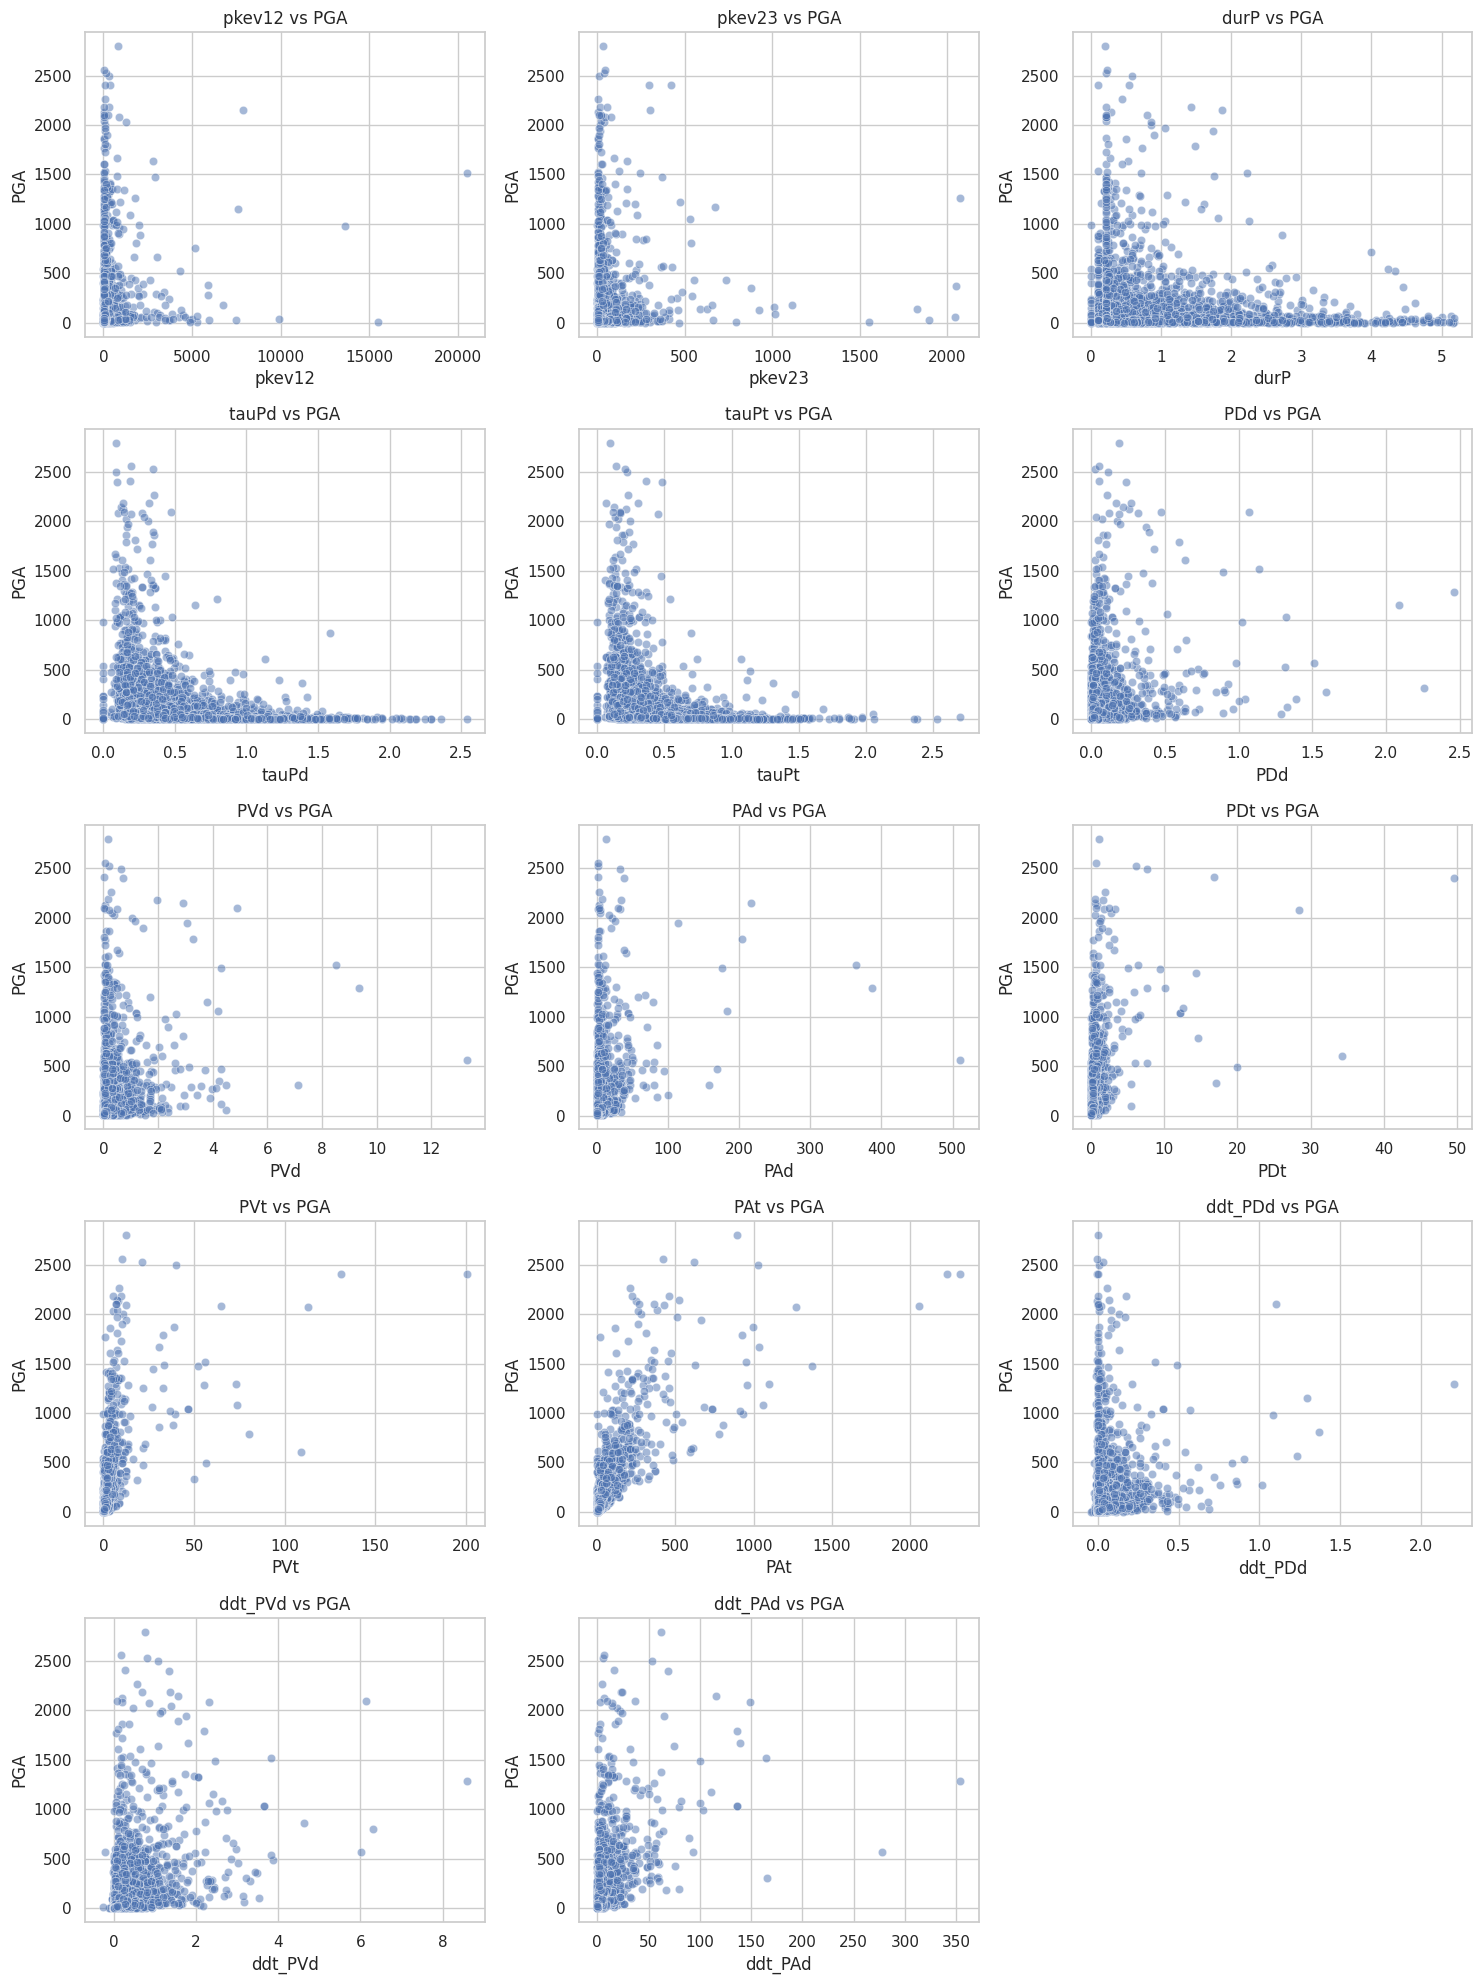

In [25]:
#SAMPLING DONE BECAUSE OF COMPUTATIONAL LIMITATIONS


max_points = 5000
plot_data = data.sample(n=max_points, random_state=42) if len(data) > max_points else data.copy()

features = plot_data.columns.tolist()
features.remove('PGA')  # target
target = 'PGA'

sns.set(style="whitegrid")

n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=plot_data[feature], y=plot_data[target],
                    ax=axes[i], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('PGA')
    axes[i].set_title(f'{feature} vs PGA')


for j in range(n_features, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


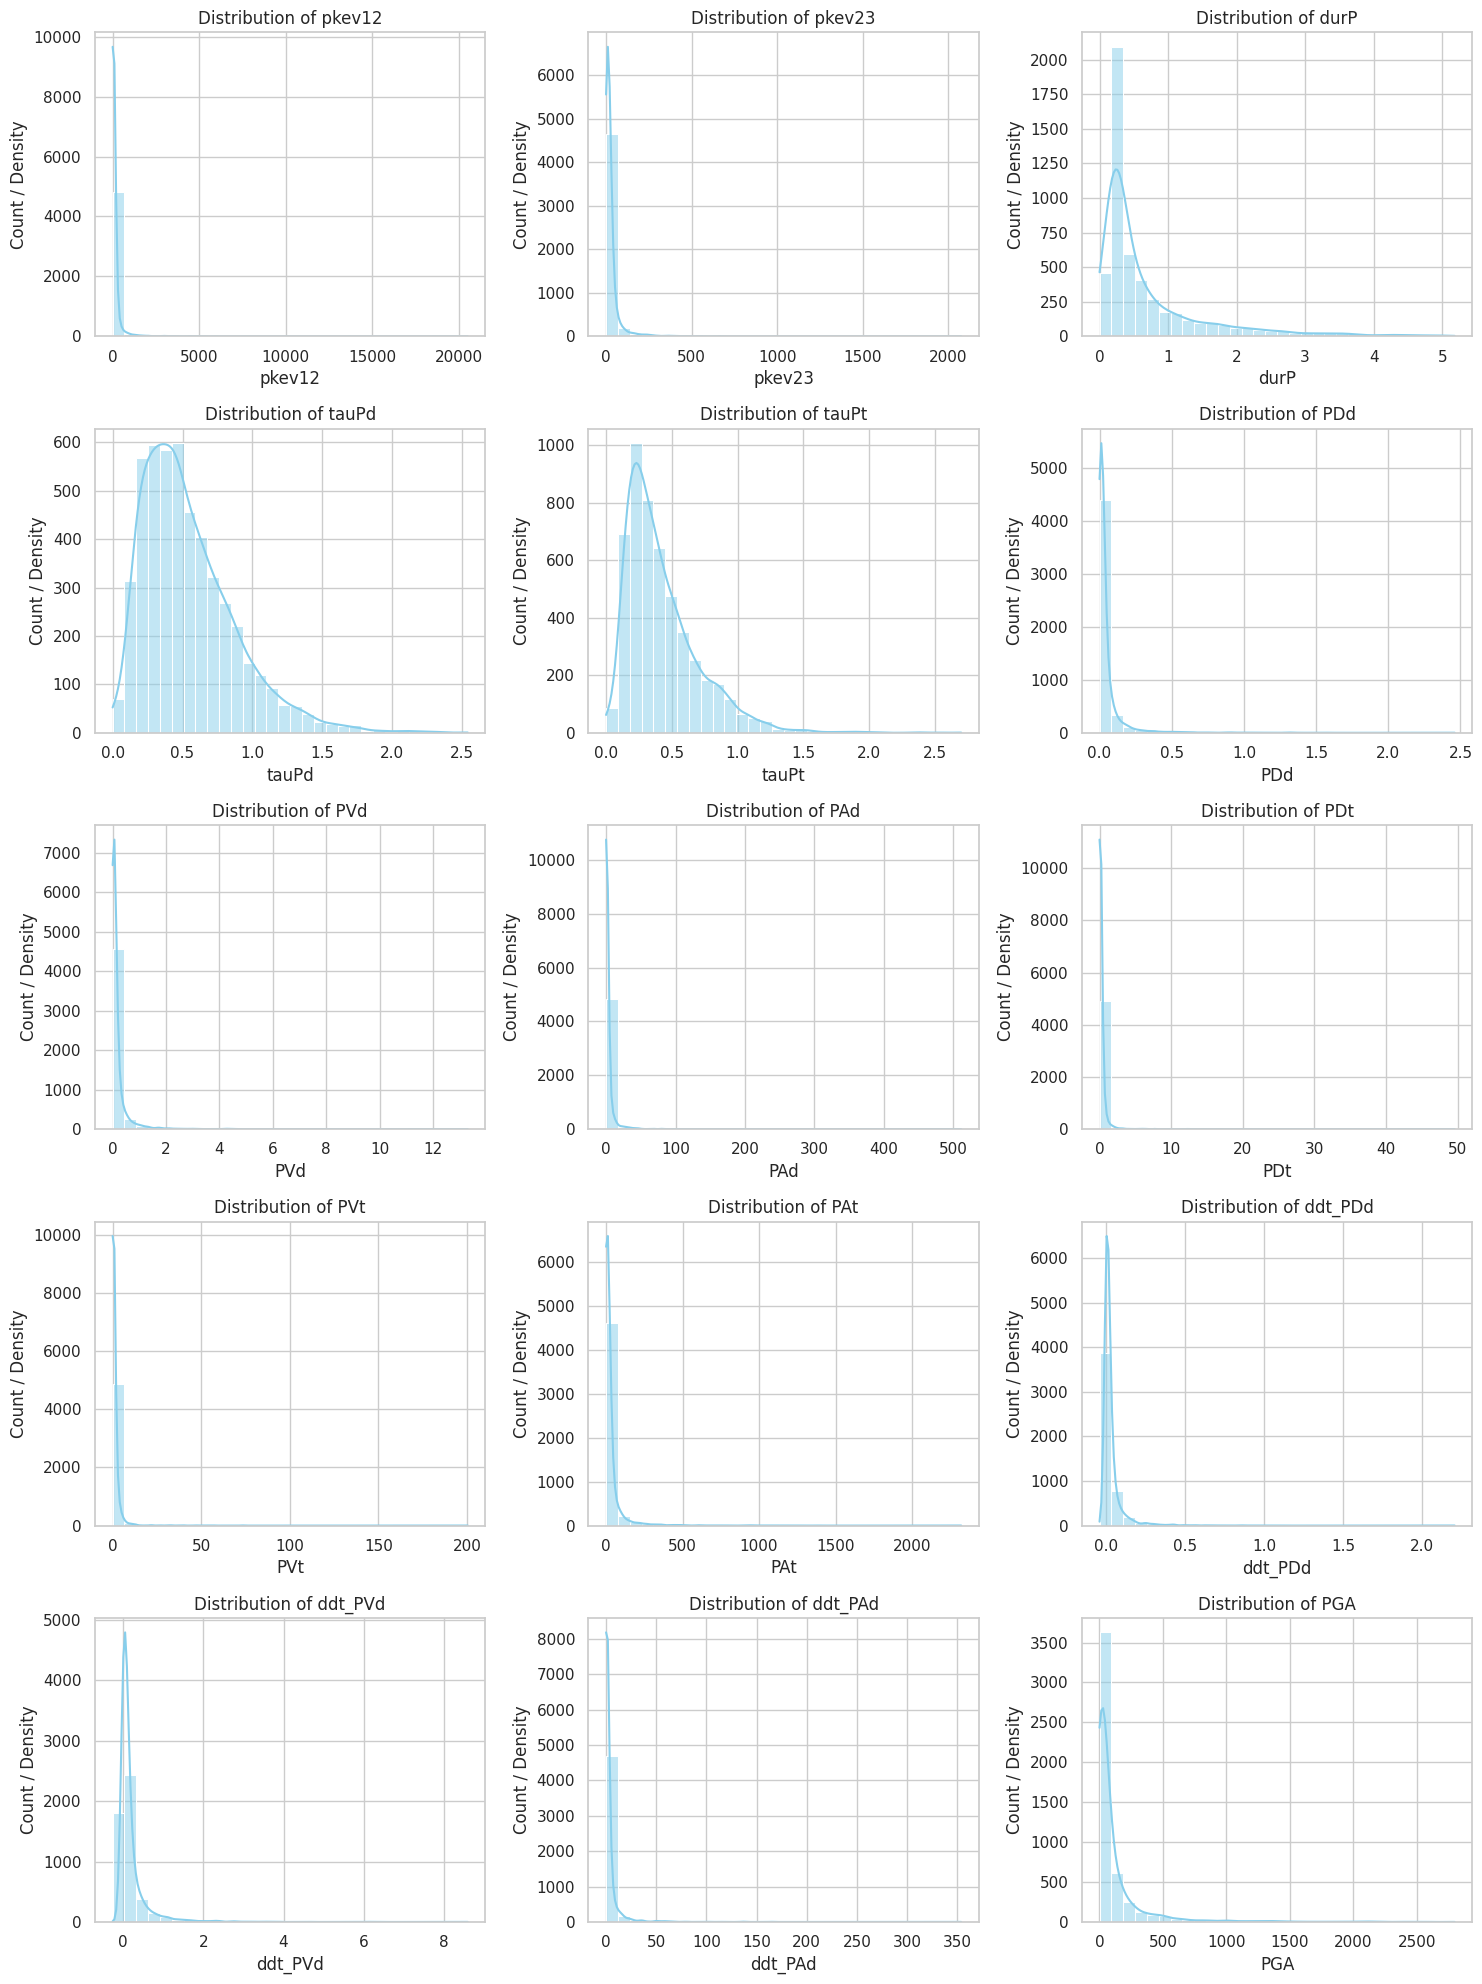

In [24]:
warnings.simplefilter(action='ignore', category=FutureWarning)
plot_data = plot_data.replace([np.inf, -np.inf], np.nan)

max_points = 5000
plot_data = plot_data.sample(n=max_points, random_state=42) if len(plot_data) > max_points else plot_data.copy()

features = plot_data.columns.tolist()
n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(plot_data[feature].dropna(), bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count / Density')

for j in range(n_features, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
